In [56]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import requests
import json
import sys
sys.path.append('../bgc-analysis')
import numpy as np
from datetime import datetime

In [57]:
SN = 1529   # UPDATE FOR EACH FLOAT

# We don't really need this code block because we aren't calculating anything, right? 

#meta = get_cal(SN)
#pcal = meta["CTD_PRES"].PREDEPLOYMENT_CALIB_COEFFICIENT
#tcal = meta["CTD_TEMP"].PREDEPLOYMENT_CALIB_COEFFICIENT
#scal = meta["CTD_CNDC"].PREDEPLOYMENT_CALIB_COEFFICIENT

In [58]:
root = '/Users/katttdaddyyyy/Library/CloudStorage/GoogleDrive-katherine.parise@whoi.edu'
filelocation = root + '/Shared drives/WHOI Argo/BGC/Float Tracking/' + 'pressure_test_results/' + 'combined_test_results/' + str(SN) + '_pressure_test_results' + ".xlsx"
df = pd.read_excel(filelocation)
display(df)

temp = df['TEMP']
pressure = df['PRES']
sal = df['PSAL']
time = df['DATE']

,Unnamed: 0,DATE,BUOYANCY_POSITION,ITERATION,HUMIDITY,PRES,TEMP,PSAL,O2_PHASE_DELAY,O2_TEMPERATURE_VOLTAGE,...,MCOMS2,MCOMS3,PH_VRS1,PH_VRS,PH_VK,PH_IK,PH_IB,PH_VIN,PH_VOUT,SN
0,0,2023-05-17 09:57:31.000,747,0,15.90,38.2,20.6287,32.531,23.609,0.630879,...,40450,306,-0.891387,-0.895005,-0.957960,-4.140000e-08,-1.970000e-08,7.05,7.06,1529
1,1,2023-05-17 09:58:55.000,699,1,15.85,37.3,20.6394,32.568,21.026,0.630662,...,39530,281,-0.894595,-0.894448,-0.957443,-4.200000e-08,-2.390000e-08,7.05,7.06,1529
2,2,2023-05-17 09:59:49.000,610,1,15.82,36.3,20.6480,32.565,20.390,0.630509,...,39290,289,-0.894736,-0.894670,-0.957802,-4.230000e-08,-2.520000e-08,7.05,7.06,1529
3,3,2023-05-17 10:00:44.000,610,1,15.72,35.9,20.6544,32.566,20.164,0.630361,...,38460,280,-0.894859,-0.894727,-0.958013,-4.150000e-08,-1.230000e-08,7.05,7.06,1529
4,4,2023-05-17 10:01:38.000,610,1,15.69,37.3,20.6619,32.566,20.074,0.630228,...,38130,316,-0.894982,-0.894858,-0.958161,-4.110000e-08,-1.530000e-08,7.05,7.06,1529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,1148,2023-05-18 11:50:00.357,221,2,15.62,543.3,20.4447,32.585,18.897,0.634652,...,36980,265,-0.906883,-0.906548,-1.003636,-4.220000e-08,-1.610000e-08,7.05,7.07,1529
1149,1149,2023-05-18 11:50:54.884,221,2,15.42,33.0,20.2943,32.588,18.807,0.637495,...,37280,260,-0.909473,-0.908959,-1.006906,-4.190000e-08,-1.390000e-08,7.05,7.07,1529
1150,1150,2023-05-18 11:51:49.355,221,2,15.29,197.4,20.3568,32.590,18.731,0.636144,...,37230,265,-0.907114,-0.906778,-1.004284,-4.090000e-08,-1.230000e-08,7.05,7.07,1529
1151,1151,2023-05-18 11:52:43.871,221,2,15.34,384.8,20.4361,32.590,18.723,0.634608,...,37160,264,-0.906373,-0.906388,-1.003741,-4.230000e-08,-2.340000e-08,7.05,7.07,1529


Text(0, 0.5, 'Pressure (dbar)')

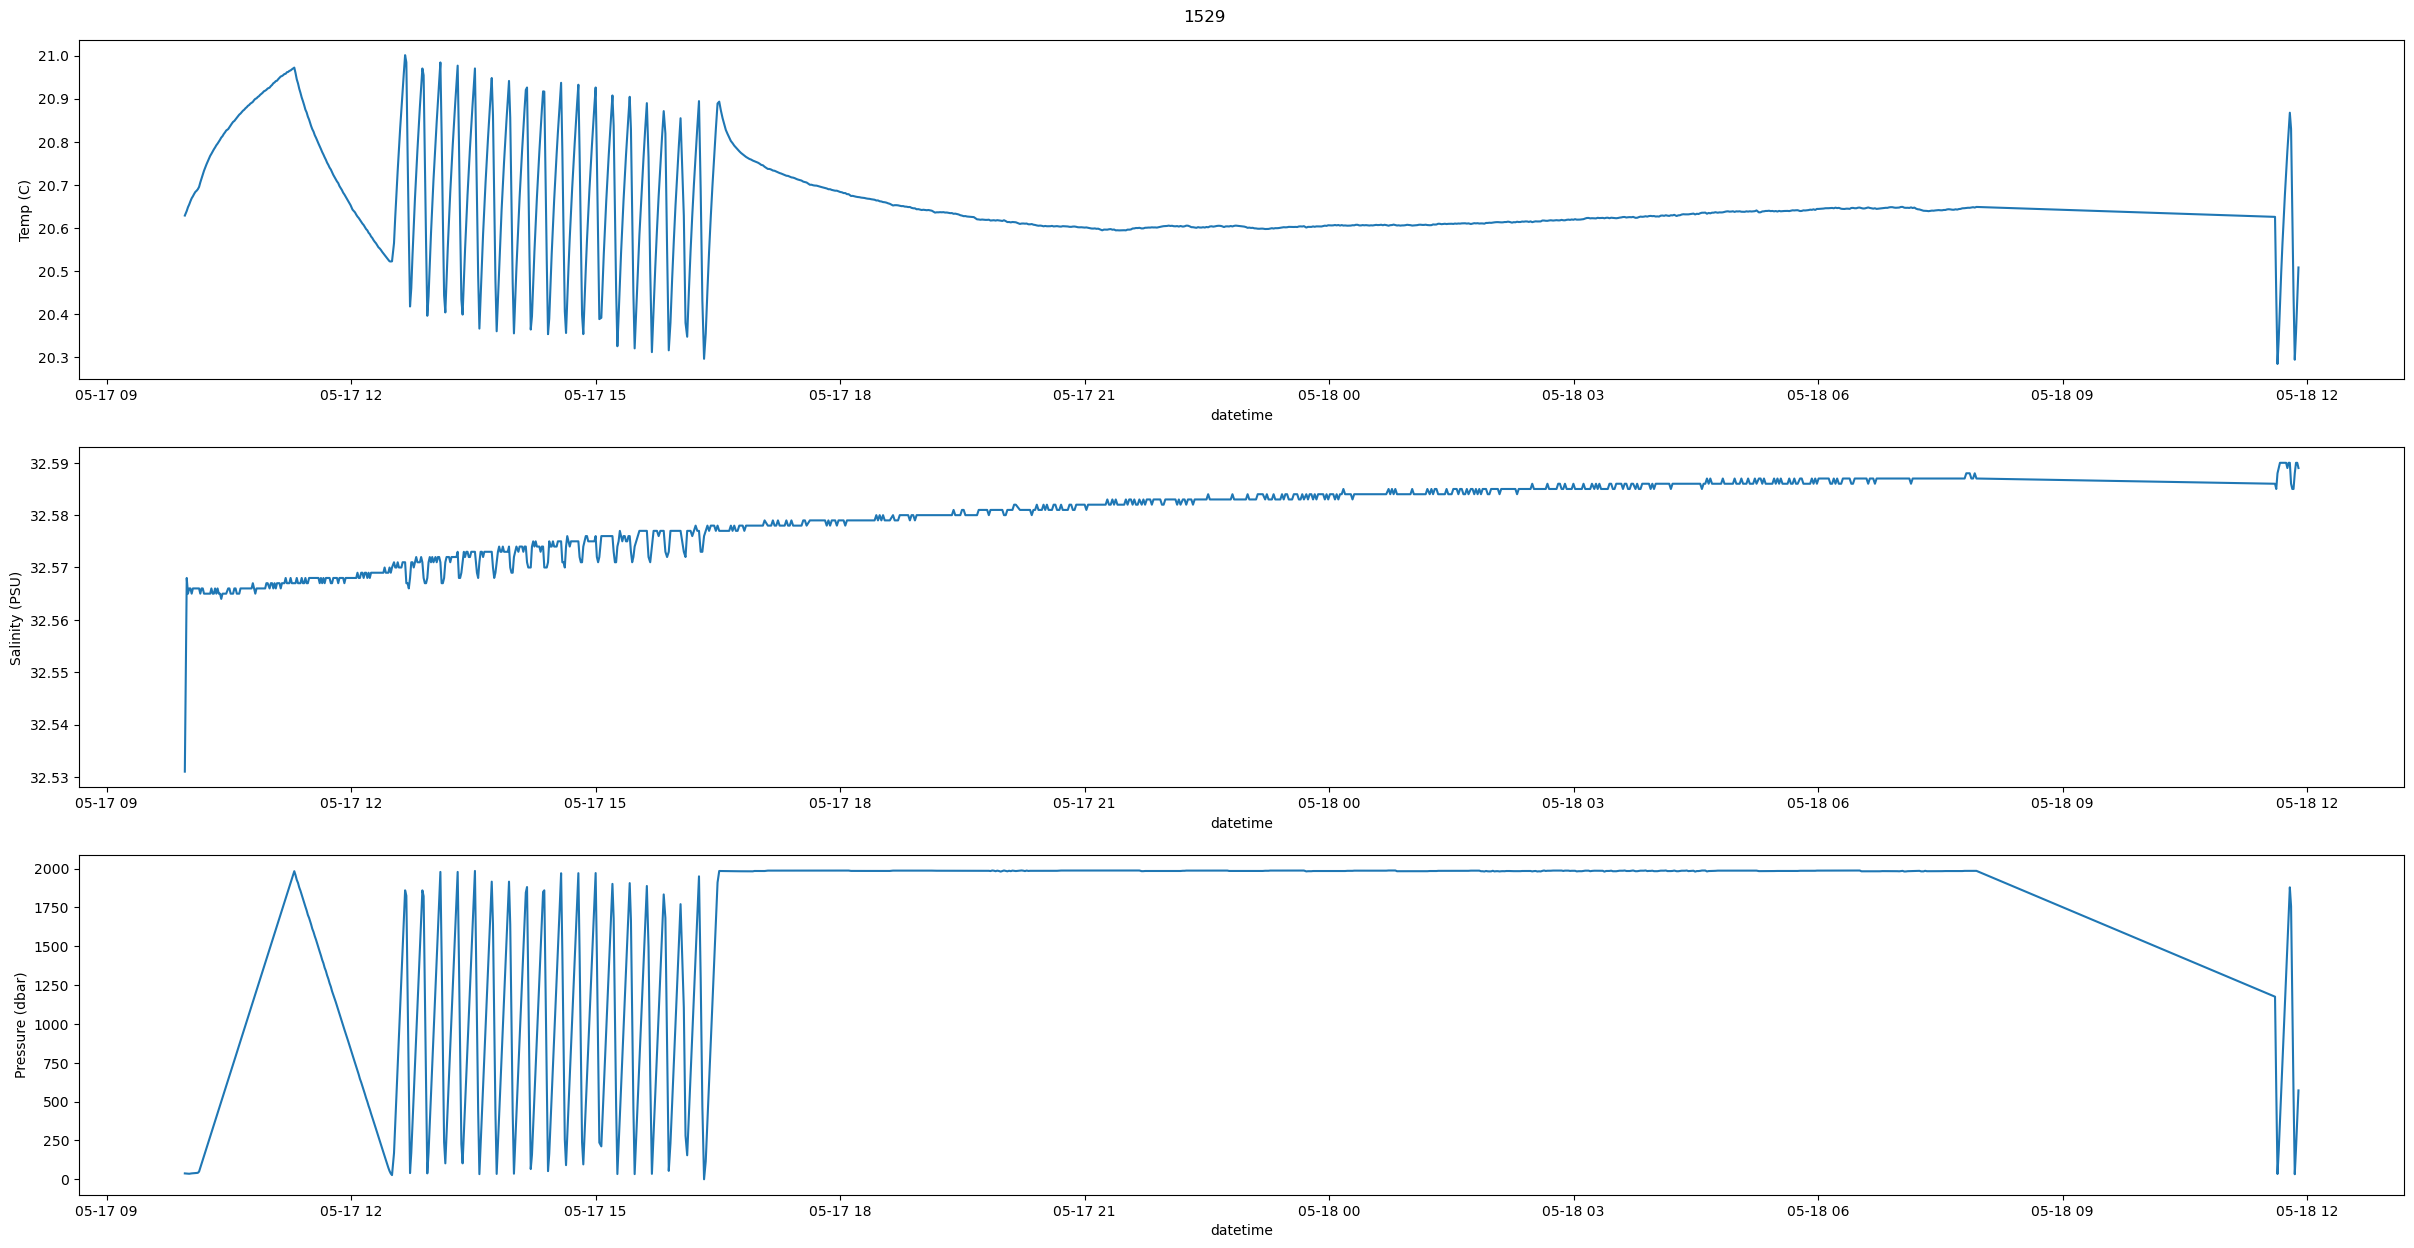

In [59]:
fig, ax = plt.subplots(3,1, figsize = (30, 15))
fig.suptitle(SN, x=0.5, y=0.9)
ax[0].plot(time,temp) # .scatter shows missing data
ax[1].plot(time,sal) # .scatter shows missing data
ax[2].plot(time,pressure) #.scatter shows missing data
ax[0].set_xlabel('datetime')
ax[0].set_ylabel('Temp (C)')
ax[1].set_xlabel('datetime')
ax[1].set_ylabel('Salinity (PSU)')
ax[2].set_xlabel('datetime')
ax[2].set_ylabel('Pressure (dbar)')

(array([19494.375, 19494.5  , 19494.625, 19494.75 , 19494.875, 19495.   ,
        19495.125, 19495.25 , 19495.375, 19495.5  ]),
 [Text(19494.375, 0, '05-17 09'),
  Text(19494.5, 0, '05-17 12'),
  Text(19494.625, 0, '05-17 15'),
  Text(19494.75, 0, '05-17 18'),
  Text(19494.875, 0, '05-17 21'),
  Text(19495.0, 0, '05-18 00'),
  Text(19495.125, 0, '05-18 03'),
  Text(19495.25, 0, '05-18 06'),
  Text(19495.375, 0, '05-18 09'),
  Text(19495.5, 0, '05-18 12')])

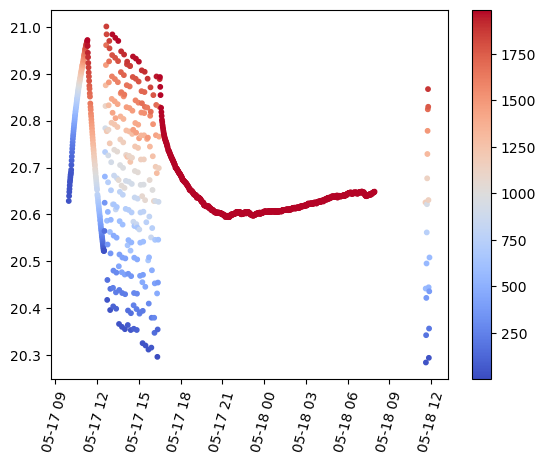

In [60]:

plt.scatter(time,temp, s = 10, c = pressure, cmap = 'coolwarm')
plt.colorbar()
plt.xticks(rotation= 75)